In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from collections import Counter
import collections
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Project5.csv')
#df.set_index('Submission ID', inplace=True)
df.head()

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,db5176773299b67a2a75c5889fb2aba7fd0fea8a,fix indent,2020-11-30 04:34:51,"['tflearn/activations.py', 'tflearn/objectives...",2,12,14,aymericdamien,aymeric.damien@gmail.com
1,0f44f97c823179d3473e6a17eaa127bdae7360d7,Adding triplet loss (#1161)\n\n* Added fashion...,2020-11-24 06:21:54,['tflearn/objectives.py'],1,25,0,Hemant Rakesh,basketballlife600@gmail.com
2,a497518b6ed0196744cca5ff4ad0a4d4329152c2,Added fashion_mnist dataset (#1160),2020-11-14 10:41:01,['tflearn/datasets/fashion_mnist.py'],1,173,0,Hemant Rakesh,basketballlife600@gmail.com
3,dc31ec05aafe67081552f964ad57cc995dfc2ff6,Fix syntax warning over comparison of literals...,2020-11-11 21:09:30,"['examples/nlp/lstm_generator_textfile.py', 't...",3,4,4,Karthikeyan Singaravelan,tir.karthi@gmail.com
4,e7148af1d97522fa4df899f57673df7f4e2680e1,merge (#1159),2020-11-11 20:42:52,['tflearn/activations.py'],1,25,6,Aymeric Damien,aymeric.damien@gmail.com


# I. Data cleaning:

### 1.Xử lý dữ liệu bị thiếu (null)

In [3]:
df.isna().sum()

# Không có dữ liệu bị thiếu

Commit ID            0
Commit Message       0
Commit Date          0
Changed Files        0
Num Changed Files    0
Additions            0
Deletions            0
Author Name          0
Author Email         0
dtype: int64

### 2.Xử lý dữ liệu trùng lặp

In [4]:
# Bỏ qua cột Commit ID vì không ảnh hưởng đến xử lý dữ liệu

In [5]:
df['Commit Message'].duplicated().sum()

45

In [6]:
df['Commit Date'].duplicated().sum()

0

In [7]:
# Bỏ qua các cột Num Changed Files, Additions, Deletions vì trùng lặp ở các cột này là chuyện bình thường của commit

In [8]:
df['Author Name'].duplicated().sum()

476

In [9]:
df['Author Email'].duplicated().sum()

481

In [10]:
df['Changed Files'].duplicated().sum()

370

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Commit ID          613 non-null    object
 1   Commit Message     613 non-null    object
 2   Commit Date        613 non-null    object
 3   Changed Files      613 non-null    object
 4   Num Changed Files  613 non-null    int64 
 5   Additions          613 non-null    int64 
 6   Deletions          613 non-null    int64 
 7   Author Name        613 non-null    object
 8   Author Email       613 non-null    object
dtypes: int64(3), object(6)
memory usage: 43.2+ KB


### 3.Xử lý ngày giờ

In [12]:
df['Commit Date'] = pd.to_datetime(df['Commit Date'])
df['Commit Date'].dtype

dtype('<M8[ns]')

### 4.Xử lý giá trị dữ liệu

In [13]:
df.describe()

,Commit Date,Num Changed Files,Additions,Deletions
count,613,613.000000,613.000000,613.000000
mean,2016-11-13 05:10:29.642740736,2.123980,55.039152,13.437194
min,2016-03-31 12:06:35,0.000000,0.000000,0.000000
25%,2016-05-28 06:31:12,1.000000,2.000000,1.000000
50%,2016-09-13 21:14:53,1.000000,6.000000,2.000000
75%,2017-02-16 03:15:38,2.000000,27.000000,6.000000
max,2020-11-30 04:34:51,80.000000,10047.000000,1623.000000
std,NaN,4.518766,421.096912,83.135636


In [14]:
# Bỏ đi 2.5% giá trị cao nhất và 2.5% thấp nhất của Num Changed Files
df = df.loc[(df['Num Changed Files'] >= df['Num Changed Files'].quantile(0.025)) & (df['Num Changed Files'] <= df['Num Changed Files'].quantile(0.975))]

In [15]:
# Bỏ đi 2.5% giá trị cao nhất và 2.5% thấp nhất của cột Additions
df = df.loc[(df['Additions'] >= df['Additions'].quantile(0.025)) & (df['Additions'] <= df['Additions'].quantile(0.975))]

In [16]:
# Bỏ đi 2.5% giá trị cao nhất và 2.5% thấp nhất của cột Deletions
df = df.loc[(df['Deletions'] >= df['Deletions'].quantile(0.025)) & (df['Deletions'] <= df['Deletions'].quantile(0.975))]

In [17]:
df.describe()

,Commit Date,Num Changed Files,Additions,Deletions
count,558,558.000000,558.000000,558.000000
mean,2016-11-14 00:33:30.125447680,1.528674,19.654122,4.388889
min,2016-03-31 12:12:17,1.000000,1.000000,0.000000
25%,2016-05-26 13:04:56,1.000000,1.000000,1.000000
50%,2016-09-18 17:19:25,1.000000,5.000000,2.000000
75%,2017-02-16 17:01:11,2.000000,19.000000,5.000000
max,2020-11-30 04:34:51,9.000000,199.000000,44.000000
std,NaN,1.092689,35.061020,6.682678


# II.Phân tích dữ liệu

## 1.Phân tích cột Commit Message

## Câu hỏi đặt ra:
+ Câu 1: Tìm những cụm xuất hiện nhiều nhất trong Commit Message
+ Câu 2: Commit Message chứa 'add' có đặc điểm gì về số lượng Additions/Deletions/Changed Files ?
+ Câu 3: Commit Message chứa 'fix' có đặc điểm gì về lượng Additions/Deletions/Changed Files ?
+ Câu 4: Commit Message chứa 'update' có đặc điểm gì về số lượng Additions/Deletions/Changed Files ?
+ Câu 5: Commit Message chứa 'Merge' có đặc điểm gì về số lượng Additions/Deletions/Changed Files ?

### Câu 1: Tìm những cụm xuất hiện nhiều nhất trong Commit Message

In [18]:
# Tạo một data frame mới chỉ chứa cột Commit Message
new_df = df.loc[:, [ "Commit Message"]]

# Loại bỏ các dấu '.', ',', '*', '#'
new_df['Commit Message'] = new_df['Commit Message'].apply(lambda x: re.sub('[.,*#]', '', x))

# Tách các từ riêng biệt trong commit message
new_df['Commit Message'] = new_df['Commit Message'].apply(lambda x: x.split())

# Đếm số lần xuất hiện của từng từ
word_counts = Counter()

for words in new_df['Commit Message']:
    word_counts.update(words)

# Lấy những từ có số lần xuất hiện nhiều nhất
most_common_words = word_counts.most_common(15)

print(most_common_words)

# Sau khi loại bỏ các cụm từ nối không nhiều ý nghĩa, ta được các cụm: fix,add,typo,update
# Các cụm pull request, Merge đều thể hiện yêu cầu được hợp nhất vào repo. Vì vậy ta chỉ cần xét cụm 'Merge'

[('fix', 165), ('to', 107), ('in', 96), ('Merge', 85), ('the', 81), ('for', 80), ('from', 80), ('pull', 71), ('request', 71), ('Fix', 67), ('a', 56), ('add', 45), ('typo', 43), ('update', 41), ('of', 40)]


### Câu 2: Commit Message chứa 'add' có đặc điểm gì về số lượng Additions/Deletions/Changed Files ?

In [19]:
# Tạo DataFrame mới với các dòng thỏa mãn điều kiện: chứa add/Add và không chứa Merge/fix/Fix
new_df =df[~df['Commit Message'].str.contains('Merge|fix|Fix', case=False)&df['Commit Message'].str.contains('add|Add', case=False)]

# Chỉ lấy 3 cột 'Changed Files', 'Additions', 'Deletions'
new_df = new_df[['Commit Message', 'Num Changed Files', 'Additions', 'Deletions']]

# In ra DataFrame mới
new_df

,Commit Message,Num Changed Files,Additions,Deletions
1,Adding triplet loss (#1161)\n\n* Added fashion...,1,25,0
2,Added fashion_mnist dataset (#1160),1,173,0
5,add swish activation function (#1155),1,18,0
8,Adding GELUs activation function (#1113)\n\nGL...,1,19,0
12,Adding hard sigmoid activation function (#1095...,1,19,0
...,...,...,...,...
566,"Add docstrings, update .gitignore to ignore fi...",2,9,0
585,projection only for the first layer inside dee...,1,8,4
601,add autoencoder to examples doc,3,3,1
604,added auto encoder example,1,61,0


In [20]:
df.describe()

,Commit Date,Num Changed Files,Additions,Deletions
count,558,558.000000,558.000000,558.000000
mean,2016-11-14 00:33:30.125447680,1.528674,19.654122,4.388889
min,2016-03-31 12:12:17,1.000000,1.000000,0.000000
25%,2016-05-26 13:04:56,1.000000,1.000000,1.000000
50%,2016-09-18 17:19:25,1.000000,5.000000,2.000000
75%,2017-02-16 17:01:11,2.000000,19.000000,5.000000
max,2020-11-30 04:34:51,9.000000,199.000000,44.000000
std,NaN,1.092689,35.061020,6.682678


In [21]:
new_df.describe()
# Với new_df là dataframe của các commit message chứa 'add'
# So sánh 2 bảng, ta có thể thấy: trung bình files thay đổi của new_df > df, trung bình additions của new_df gấp đôi df
# Chỉ có trung bình deletions là ít hơn.
# Max new_df['Additions'] giống với df['Additions']
# Có vẻ commit message chứa 'add' sẽ có số lượng additions nhiều hơn bình thường, số lượng deletions ít hơn.

,Num Changed Files,Additions,Deletions
count,86.000000,86.000000,86.000000
mean,1.639535,45.139535,2.860465
std,1.016485,47.983616,5.711006
min,1.000000,1.000000,0.000000
25%,1.000000,8.250000,0.000000
50%,1.000000,25.000000,1.000000
75%,2.000000,66.500000,3.000000
max,6.000000,199.000000,39.000000


### Câu 3: Commit Message chứa 'fix' có đặc điểm gì về lượng Additions/Deletions/Changed Files ?

In [22]:
# Tạo DataFrame mới với các dòng thỏa mãn điều kiện: chứa fix/Fix và không chứa Merge/add/Add
new_df=df[~df['Commit Message'].str.contains('Merge|add|Add', case=False)&df['Commit Message'].str.contains('fix|Fix', case=False)]

# Chỉ lấy 3 cột 'Changed Files', 'Additions', 'Deletions'
new_df = new_df[['Commit Message', 'Num Changed Files', 'Additions', 'Deletions']]

# In ra DataFrame mới
new_df

,Commit Message,Num Changed Files,Additions,Deletions
0,fix indent,2,12,14
3,Fix syntax warning over comparison of literals...,3,4,4
11,fix r2_op to match sklearn.metrics.r2_score (#...,1,3,3
13,Fixing termlogs for R2 (#1093)\n\n* Fixing ter...,1,1,1
18,quick fix,1,2,1
...,...,...,...,...
600,minor fix,3,11,7
605,minor fix,3,9,4
607,fix typo,2,2,2
608,fix typo,2,2,2


In [23]:
df.describe()

,Commit Date,Num Changed Files,Additions,Deletions
count,558,558.000000,558.000000,558.000000
mean,2016-11-14 00:33:30.125447680,1.528674,19.654122,4.388889
min,2016-03-31 12:12:17,1.000000,1.000000,0.000000
25%,2016-05-26 13:04:56,1.000000,1.000000,1.000000
50%,2016-09-18 17:19:25,1.000000,5.000000,2.000000
75%,2017-02-16 17:01:11,2.000000,19.000000,5.000000
max,2020-11-30 04:34:51,9.000000,199.000000,44.000000
std,NaN,1.092689,35.061020,6.682678


In [24]:
new_df.describe()
# Nhìn chung, trung bình số lượng files thay đổi, additions, deletions của new_df đều thấp hơn df
# Max 3 cột trong new_df thấp hơn rất nhiều so với df
# Có thể kết luận: commit message có 'fix' thường chỉ thay đổi rất ít so với code ban đầu.

,Num Changed Files,Additions,Deletions
count,206.000000,206.000000,206.000000
mean,1.344660,7.631068,4.077670
std,0.845444,13.436383,5.509529
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000
75%,1.000000,7.750000,4.000000
max,7.000000,123.000000,30.000000


### Câu 4: Commit Message chứa 'update' có đặc điểm gì về số lượng Additions/Deletions/Changed Files ?

In [25]:
# Tạo DataFrame mới với các dòng thỏa mãn điều kiện: chứa update/Update và không chứa Merge/fix/Fix
new_df=df[~df['Commit Message'].str.contains('Merge|fix|Fix', case=False)&df['Commit Message'].str.contains('update|Update', case=False)]

# Chỉ lấy 3 cột 'Changed Files', 'Additions', 'Deletions'
new_df = new_df[['Commit Message', 'Num Changed Files', 'Additions', 'Deletions']]

# In ra DataFrame mới
new_df

,Commit Message,Num Changed Files,Additions,Deletions
14,Update SELU (#1092),1,1,3
25,Tensorflow updated the attribute (#1024)\n\nht...,1,1,1
27,VGG19 Network and weights (#1003)\n\n* Create...,2,63,0
35,update to_categorical\n\ntemporary add the old...,1,2,1
52,update:recommender_wide_and_deep.py (#838)\n\n...,1,1,1
...,...,...,...,...
580,Update evaluator.py,1,4,1
583,update getting_started docs,1,1,1
595,update training mode doc,1,20,1
603,update argument documentation,1,1,1


In [26]:
df.describe()

,Commit Date,Num Changed Files,Additions,Deletions
count,558,558.000000,558.000000,558.000000
mean,2016-11-14 00:33:30.125447680,1.528674,19.654122,4.388889
min,2016-03-31 12:12:17,1.000000,1.000000,0.000000
25%,2016-05-26 13:04:56,1.000000,1.000000,1.000000
50%,2016-09-18 17:19:25,1.000000,5.000000,2.000000
75%,2017-02-16 17:01:11,2.000000,19.000000,5.000000
max,2020-11-30 04:34:51,9.000000,199.000000,44.000000
std,NaN,1.092689,35.061020,6.682678


In [27]:
new_df.describe()

# Commit Message chứa 'update' có số lượng trung bình additions,deletions,files tương đối gần với trung bình 3 cột này trong df
# Chỉ có số lượng trung bình deletions new_df cao hơn df
# Không có điểm đặc biệt 

,Num Changed Files,Additions,Deletions
count,62.000000,62.000000,62.000000
mean,1.677419,19.145161,6.064516
std,1.251546,32.580215,9.450251
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,5.500000,2.000000
75%,2.000000,22.250000,8.000000
max,6.000000,164.000000,39.000000


### Câu 5: Commit Message chứa 'Merge' có đặc điểm gì về số lượng Additions/Deletions/Changed Files ?

In [28]:
# Tạo DataFrame mới với các dòng thỏa mãn điều kiện: chứa Merge và không chứa Add/fix/Fix
new_df=df[~df['Commit Message'].str.contains('Add|Fix', case=False)&df['Commit Message'].str.contains('Merge', case=False)]

# Chỉ lấy 3 cột 'Changed Files', 'Additions', 'Deletions'
new_df = new_df[['Commit Message', 'Num Changed Files', 'Additions', 'Deletions']]

# In ra DataFrame mới
new_df.head()

,Commit Message,Num Changed Files,Additions,Deletions
4,merge (#1159),1,25,6
23,Update merge_ops.py (#1050),1,1,1
97,Merge remote-tracking branch 'origin/master',1,5,1
105,Merge pull request #691 from mathandy/a-workin...,1,1,1
110,Merge pull request #675 from EricPerbos/patch-...,1,1,1


In [29]:
# Tạo DataFrame mới với các dòng có Title chứa 'Merge'
new_df = df[df['Commit Message'].str.contains('Merge')]

# Chỉ lấy 3 cột 'Changed Files', 'Additions', 'Deletions'
new_df = new_df[['Commit Message', 'Num Changed Files', 'Additions', 'Deletions']]

In [30]:
df.describe()

,Commit Date,Num Changed Files,Additions,Deletions
count,558,558.000000,558.000000,558.000000
mean,2016-11-14 00:33:30.125447680,1.528674,19.654122,4.388889
min,2016-03-31 12:12:17,1.000000,1.000000,0.000000
25%,2016-05-26 13:04:56,1.000000,1.000000,1.000000
50%,2016-09-18 17:19:25,1.000000,5.000000,2.000000
75%,2017-02-16 17:01:11,2.000000,19.000000,5.000000
max,2020-11-30 04:34:51,9.000000,199.000000,44.000000
std,NaN,1.092689,35.061020,6.682678


In [31]:
new_df.describe()
# Trung bình additions của new_df > df .Trung bình của 2 cột files và deletions lại thấp hơn df nhưng không đáng kể
# Commit mà message chứa 'Merge' thường có lượng additions lớn hơn commit thông thường

,Num Changed Files,Additions,Deletions
count,85.000000,85.000000,85.000000
mean,1.505882,24.447059,3.917647
std,1.108662,43.172551,5.792466
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,4.000000,2.000000
75%,1.000000,21.000000,5.000000
max,6.000000,193.000000,39.000000


### Câu 6: Các commit message trùng nhau có đặc điểm gì ?

In [32]:
# Tạo DataFrame mới từ các dòng chứa title trùng lặp
duplicate_df = df.loc[df.duplicated(subset='Commit Message', keep=False)]

# Chỉ lấy 3 cột 'Changed Files', 'Additions', 'Deletions'
duplicate_df = duplicate_df[['Commit Message', 'Num Changed Files', 'Additions', 'Deletions','Commit Date','Author Name']]

# In ra DataFrame mới
duplicate_df

,Commit Message,Num Changed Files,Additions,Deletions,Commit Date,Author Name
29,minor fix,1,1,3,2018-01-11 19:55:02,aymericdamien
31,fix bug,1,1,1,2018-01-09 19:23:08,aymericdamien
49,fix bug,1,3,3,2017-07-26 22:51:53,aymericdamien
72,fix generator,1,1,1,2017-05-25 16:21:41,aymericdamien
75,fix typo,2,2,2,2017-05-23 18:12:53,aymericdamien
76,fix typo,1,1,1,2017-05-23 18:09:48,Aymeric Damien
86,fix bug,1,1,1,2017-05-09 03:44:58,aymericdamien
89,fix bug,1,5,1,2017-04-27 22:47:04,Aymeric Damien
97,Merge remote-tracking branch 'origin/master',1,5,1,2017-04-07 20:26:46,aymericdamien
100,fix bug,1,1,1,2017-04-04 17:26:47,aymericdamien


## 2.Phân tích đồng thời 3 cột: Additions, Deletions, Num Changed Files

### Câu hỏi đặt ra:
+ Câu 1: Additions và Deletions có mối quan hệ tuyến tính không ? Nếu có là đồng biến hay nghịch biến ?
+ Câu 2: Additions và Num Changed Files có mối quan hệ tuyến tính không ? Nếu có là đồng biến hay nghịch biến ?
+ Câu 3: Số lượng additions/deletions/files theo năm ?
+ Câu 4: Tồn tại tính chất theo mùa (seasonality) của Additions/Deletions/Num Changed Files hay không ?

### Câu 1: Additions và Deletions có mối quan hệ tuyến tính không ?

Text(0.5, 1.0, 'Biểu đồ thể hiện quan hệ của Additions và Deletions')

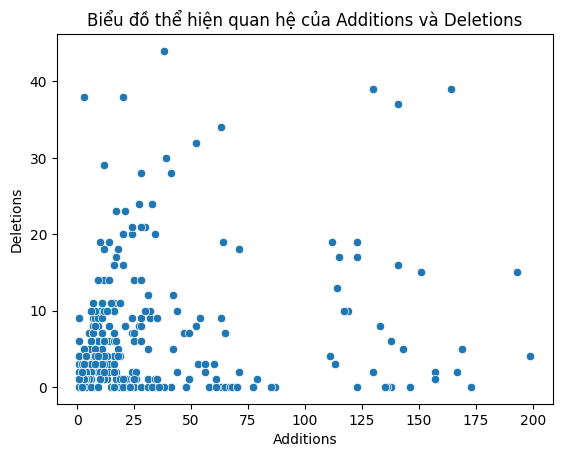

In [33]:
new_df = df.loc[:, ["Additions", "Deletions"]]

sns.scatterplot(x = 'Additions', y='Deletions', data = new_df)

plt.title('Biểu đồ thể hiện quan hệ của Additions và Deletions')

# Dựa vào biểu đồ phân tán, ta có thể kết luận additions và deletions không có mối quan hệ tuyến tính

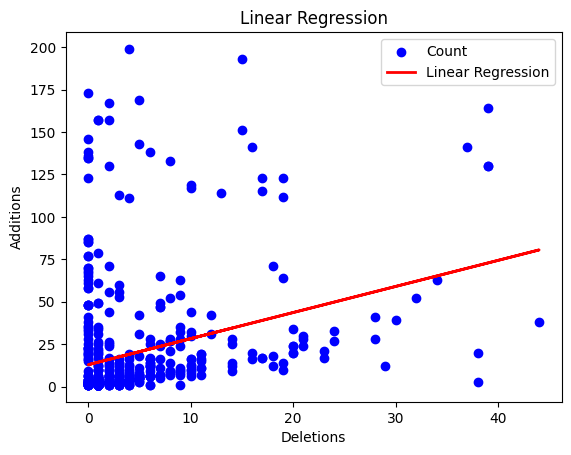

In [34]:
# Chọn biến độc lập và biến phụ thuộc
X = new_df[['Deletions']]  # Biến độc lập
y = new_df['Additions']  # Biến phụ thuộc

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Vẽ biểu đồ với đường hồi quy của Additions và Deletions
plt.scatter(X, y, color='blue', label='Count')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Deletions')
plt.ylabel('Additions')
plt.title('Linear Regression')
plt.legend()
plt.show()

### Câu 2: Additions và Changed Files có mối quan hệ tuyến tính không ? 

Text(0.5, 1.0, 'Biểu đồ biểu diễn Additions và Changed Files')

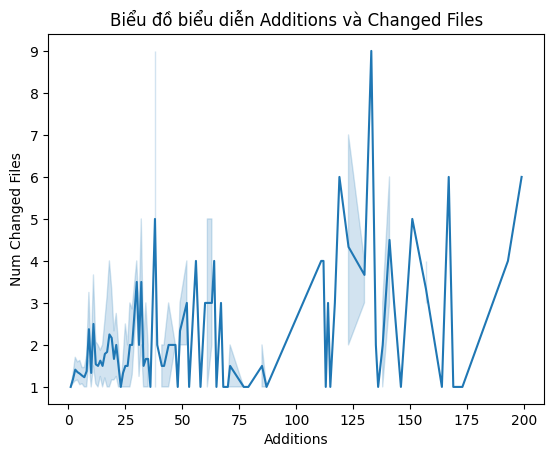

In [35]:
# Vẽ biểu đồ đường để thể hiện quan hệ

#Tạo df mới
new_df = df.loc[:, ["Additions", "Num Changed Files"]]
# Vẽ biểu đồ đường
sns.lineplot(x = 'Additions', y = 'Num Changed Files', data = new_df)
plt.title('Biểu đồ biểu diễn Additions và Changed Files')

# Từ biểu đồ, ta có nhận xét: 2 đường biến đổi độc lập, additions không có mối quan hệ tuyến tính với Changed Files

### Câu 3: Số lượng additions/deletions/changed files theo tháng và năm ?

<Figure size 1600x1000 with 0 Axes>

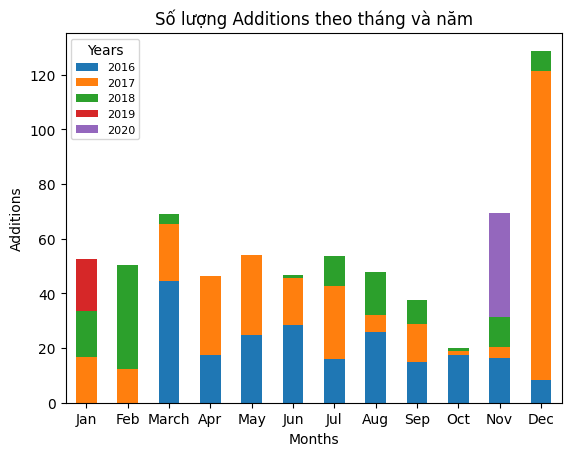

In [36]:
# Additions theo tháng

# Copy và chỉnh sửa dữ liệu để vẽ biểu đồ cột theo tháng
df_bar = df.copy()
df_bar['Year'] = df_bar['Commit Date'].dt.year
df_bar['Month'] = df_bar['Commit Date'].dt.month

# Group dữ liệu và tính giá trị trung bình cho mỗi tháng trong năm
df_bar_group = df_bar.groupby(['Year', 'Month'])['Additions'].mean().reset_index()

# Chuyển cột 'Year' và 'Month' thành kiểu dữ liệu số nguyên
df_bar_group['Year'] = df_bar_group['Year'].astype(int)
df_bar_group['Month'] = df_bar_group['Month'].astype(int)

# Sắp xếp DataFrame theo cột 'Year' và 'Month'
df_bar_group = df_bar_group.sort_values(['Year', 'Month'])

# Tạo biểu đồ cột chồng
plt.figure(figsize=(16, 10))
ax = df_bar_group.pivot(index='Month', columns='Year', values='Additions').plot(kind='bar', stacked=True)

# Đặt tiêu đề và nhãn cho các trục
plt.title('Số lượng Additions theo tháng và năm')
plt.xlabel('Months')
plt.ylabel('Additions')
ax.set_xticklabels(['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Chỉnh lại trục x thành dạng nằm ngang.
plt.xticks(rotation='horizontal')

# Thu nhỏ bảng chú thích
ax.legend(prop={'size': 8}, title = 'Years')
    
# Hiển thị biểu đồ
plt.show()

# Tháng 12 có số lượng addtions lớn nhất với hơn 120 additions, tháng 10 ít nhất với gần 20 addtions
# Năm 2017 người dùng đóng góp nhiều additions nhất và đều đặn nhất (tháng nào cũng có additions)


<Figure size 1600x1000 with 0 Axes>

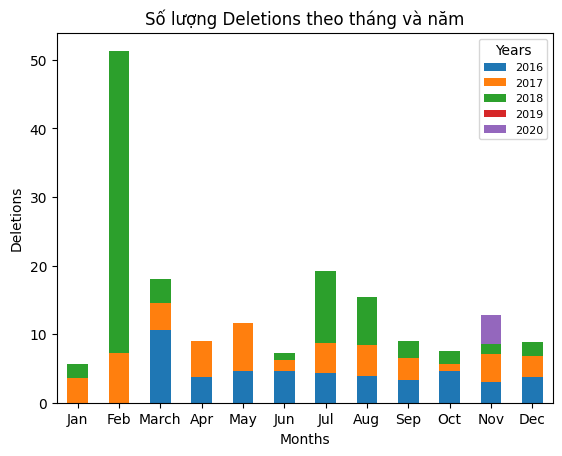

In [37]:
# Deletions theo tháng và năm

# Group dữ liệu và tính giá trị trung bình cho mỗi tháng trong năm
df_bar_group = df_bar.groupby(['Year', 'Month'])['Deletions'].mean().reset_index()

# Sắp xếp DataFrame theo cột 'Year' và 'Month'
df_bar_group = df_bar_group.sort_values(['Year', 'Month'])

# Tạo biểu đồ cột chồng
plt.figure(figsize=(16, 10))
ax = df_bar_group.pivot(index='Month', columns='Year', values='Deletions').plot(kind='bar', stacked=True)

# Đặt tiêu đề và nhãn cho các trục
plt.title('Số lượng Deletions theo tháng và năm')
plt.xlabel('Months')
plt.ylabel('Deletions')
ax.set_xticklabels(['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Chỉnh lại trục x thành dạng nằm ngang.
plt.xticks(rotation='horizontal')

# Thu nhỏ bảng chú thích
ax.legend(prop={'size': 8}, title = 'Years')
    
# Hiển thị biểu đồ
plt.show()

# Tháng 2 có số lượng addtions lớn nhất với hơn 50 deletions, tháng 1 ít nhất chỉ có khoảng 5 deletions.
# Năm 2018 người dùng đóng góp nhiều deletions nhất, năm 2017 vẫn là năm có số lượng deletions đều đặn nhất.
# Sang năm 2019 không có deletions, năm 2020 chỉ có deletions vào tháng 11.


<Figure size 1600x1000 with 0 Axes>

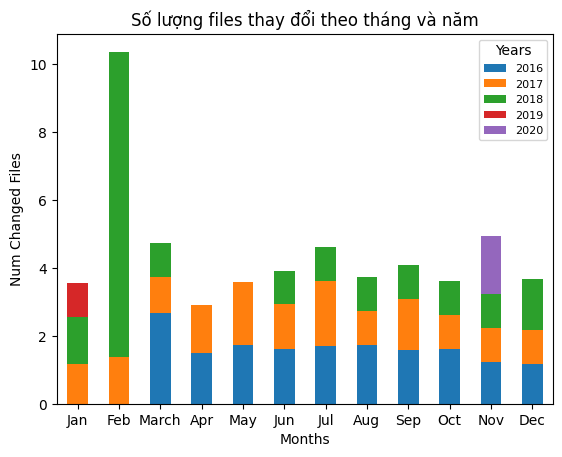

In [38]:
# Changed Files theo tháng và năm

# Group dữ liệu và tính giá trị trung bình cho mỗi tháng trong năm
df_bar_group = df_bar.groupby(['Year', 'Month'])['Num Changed Files'].mean().reset_index()

# Sắp xếp DataFrame theo cột 'Year' và 'Month'
df_bar_group = df_bar_group.sort_values(['Year', 'Month'])

# Tạo biểu đồ cột chồng
plt.figure(figsize=(16, 10))
ax = df_bar_group.pivot(index='Month', columns='Year', values='Num Changed Files').plot(kind='bar', stacked=True)

# Đặt tiêu đề và nhãn cho các trục
plt.title('Số lượng files thay đổi theo tháng và năm')
plt.xlabel('Months')
plt.ylabel('Num Changed Files')
ax.set_xticklabels(['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Chỉnh lại trục x thành dạng nằm ngang.
plt.xticks(rotation='horizontal')

# Thu nhỏ bảng chú thích
ax.legend(prop={'size': 8}, title = 'Years')
    
# Hiển thị biểu đồ
plt.show()

# Tháng 2 có số lượng addtions lớn nhất với hơn 10 files, tháng 4 ít nhất với khoảng 3 files.
# Năm 2018 người dùng đóng góp nhiều files nhất, các files được thay đổi mỗi tháng vào năm 2017.

### Câu 4: Tồn tại tính chất theo mùa (seasonality) của Additions/Deletions/Num Changed Files hay không ?

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'March'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

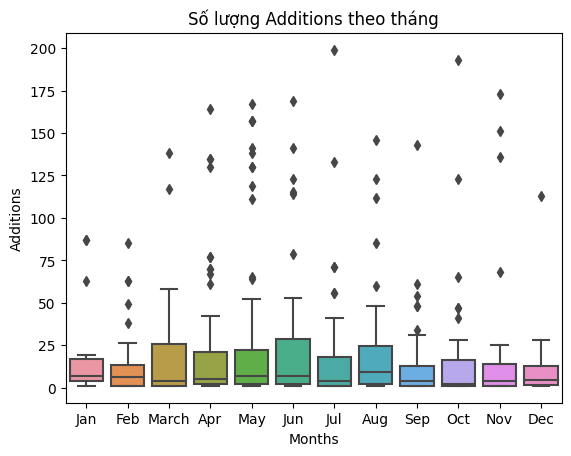

In [39]:
# Vẽ đồ thị box plot biểu diễn additions theo tháng.

# Copy và chỉnh sửa dữ liệu để vẽ biểu đồ box plot theo tháng
df_box = df.copy()
df_box['Month'] = df_box['Commit Date'].dt.month

ax = sns.boxplot(x = 'Month', y = 'Additions', data = df_box)
# Đặt tiêu đề và nhãn cho các trục
plt.title('Số lượng Additions theo tháng')
plt.xlabel('Months')
plt.ylabel('Additions')
ax.set_xticklabels(['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Tháng 6 là tháng có số lượng additions nhiều nhất. Ngoài ra, các tháng đầu năm và cuối năm chênh nhau không đáng kể.
# Vì vậy ta không thể kết luận Additions có tính chất theo mùa (seasonality).

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'March'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

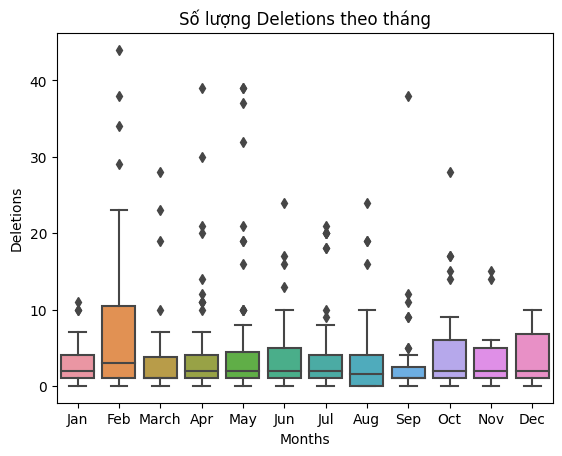

In [40]:
# Vẽ đồ thị box plot biểu diễn additions theo tháng.

ax = sns.boxplot(x = 'Month', y = 'Deletions', data = df_box)
# Đặt tiêu đề và nhãn cho các trục
plt.title('Số lượng Deletions theo tháng')
plt.xlabel('Months')
plt.ylabel('Deletions')
ax.set_xticklabels(['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Tháng 2 là tháng có số lượng deletions nhiều nhất
# 3 tháng cuối năm và 2 tháng đầu năm có số lượng deletions cao nhất

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'March'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

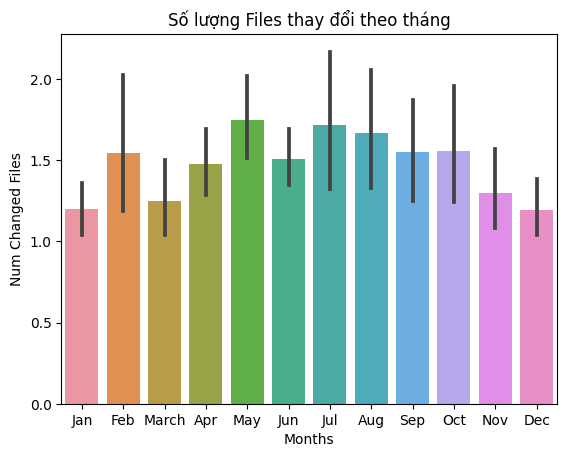

In [41]:
# Vẽ đồ thị bar plot biểu diễn Changed Files theo tháng

ax = sns.barplot(x = 'Month', y = 'Num Changed Files', data = df_bar)
# Đặt tiêu đề và nhãn cho các trục
plt.title('Số lượng Files thay đổi theo tháng')
plt.xlabel('Months')
plt.ylabel('Num Changed Files')
ax.set_xticklabels(['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Tháng 5 là tháng có số lượng files thay đổi nhiều nhất.
# Nhìn chung, số lượng files thay đổi của các tháng khá là đồng đều, không chênh nhau quá nhiều
# Ta có thể kết luận số lượng files thay đổi không có tính chất theo mùa.

## 3.Phân tích Author Name

### Câu hỏi đặt ra:
+ Câu 1: Tác giả nào có nhiều additions/deletions/num changed files/commits nhất ?
+ Câu 2: Các tác giả thường commit vào thời điểm nào trong ngày ?
+ Câu 3: Số lượng tác giả đóng góp qua các năm ?

### Câu 1: Tác giả nào có nhiều additions/deletions/changed files nhất ?

In [42]:
# Tạo DataFrame mới của các tác giả với số lượng additions/deletions/files đóng góp.
new_df = pd.DataFrame({
    'Author Name': df['Author Name'].unique(),
    'Additions': df.groupby('Author Name')['Additions'].sum(),
    'Deletions': df.groupby('Author Name')['Deletions'].sum(),
    'Num Changed Files': df.groupby('Author Name')['Num Changed Files'].sum()
})

# Hiển thị DataFrame mới
new_df


,Author Name,Additions,Deletions,Num Changed Files
Author Name,,,,
=,aymericdamien,1,1,1
Adrian Lyjak,Hemant Rakesh,21,16,7
Aeefire,Karthikeyan Singaravelan,1,1,1
Ahmet Hamza Emra,Aymeric Damien,64,1,3
Akshay.L.Aradhya,vishal sharma,6,6,1
...,...,...,...,...
wyj2046,Brett Naul,3,3,3
zhengyao jiang,John Sutton,1,1,1
ziky90,Adrian Lyjak,32,0,3


In [43]:
# Tác giả có nhiều additions nhất: 
max_additions_author = new_df['Additions'].idxmax()
max_additions = new_df['Additions'].max()

In [44]:
# Tác giả có nhiều deletions nhất:

max_deletions_author = new_df['Deletions'].idxmax()
max_deletions = new_df['Deletions'].max()

In [45]:
# Tác giả có nhiều commits nhất:
author_counts = df['Author Name'].value_counts()
most_frequent_author = author_counts.idxmax()
max_commits = author_counts.max()

In [46]:
# Tác giả có nhiều files thay đổi nhất:
max_files_author = new_df['Num Changed Files'].idxmax()
max_files = new_df['Num Changed Files'].max()

print("Tác giả có số lượng files thay đổi nhiều nhất là:", max_files_author,"với",max_files,"files")
print("Tác giả có số lượng additions nhiều nhất là:",max_additions_author,"với",max_additions,"additions")
print("Tác giả có số lượng deletions nhiều nhất là:",max_deletions_author, "với",max_deletions,"deletions")
print("Tác giả có số lượng commits nhiều nhất là:", most_frequent_author,"với",max_commits,"commits")

Tác giả có số lượng files thay đổi nhiều nhất là: aymericdamien với 398 files
Tác giả có số lượng additions nhiều nhất là: aymericdamien với 5262 additions
Tác giả có số lượng deletions nhiều nhất là: aymericdamien với 1302 deletions
Tác giả có số lượng commits nhiều nhất là: aymericdamien với 214 commits


In [47]:
# Từ 4 yếu tố: số lượng additions, deletions, files thay đổi, commits dẫn đến kết luận: 
# 'aymericdamien' là tác giả tích cực đóng góp nhất

### Câu 2: Các tác giả thường commit vào thời điểm nào trong ngày ?

In [48]:
# Lọc các hàng trong khoảng thời gian cố định

filtered_df = df[df['Commit Date'].dt.hour.between(0, 6)]
filtered_df2 = df[df['Commit Date'].dt.hour.between(6, 12)]
filtered_df3 = df[df['Commit Date'].dt.hour.between(12, 18)]
filtered_df4 = df[df['Commit Date'].dt.hour.between(18, 24)]

# Đếm số lượng tác giả duy nhất trong khoảng thời gian đó
author_count = filtered_df['Author Name'].nunique()
author_count2 = filtered_df2['Author Name'].nunique()
author_count3 = filtered_df3['Author Name'].nunique()
author_count4 = filtered_df4['Author Name'].nunique()

# Hiển thị số lượng tác giả
print("Số lượng tác giả commit trong khoảng thời gian từ 0 giờ đến 6 giờ: ", author_count)
print("Số lượng tác giả commit trong khoảng thời gian từ 6 giờ đến 12 giờ: ", author_count2)
print("Số lượng tác giả commit trong khoảng thời gian từ 12 giờ đến 18 giờ: ", author_count3)
print("Số lượng tác giả commit trong khoảng thời gian từ 18 giờ đến 24 giờ: ", author_count4)

Số lượng tác giả commit trong khoảng thời gian từ 0 giờ đến 6 giờ:  54
Số lượng tác giả commit trong khoảng thời gian từ 6 giờ đến 12 giờ:  45
Số lượng tác giả commit trong khoảng thời gian từ 12 giờ đến 18 giờ:  50
Số lượng tác giả commit trong khoảng thời gian từ 18 giờ đến 24 giờ:  51


In [49]:
# Ta có nhận xét: Số lượng tác giả commit tại các thời điểm khác nhau trong ngày là khá tương đồng.

### Câu 3: Số lượng commit các tác giả đóng góp qua các năm ?

In [50]:
# Số lượng commit các tác giả đóng góp qua các năm:

new_df = df.loc[:, ["Commit Date", "Author Name"]]

new_df['Year'] = new_df['Commit Date'].dt.year

# Đếm số lượng tác giả xuất hiện theo từng năm
author_counts_by_year = new_df.groupby('Year')['Author Name'].nunique().reset_index()
# Đặt lại tên cột:
author_counts_by_year.columns = ['Year','Commit']
# In ra số lượng tác giả xuất hiện theo từng năm
print(author_counts_by_year)

   Year  Commit
0  2016      76
1  2017      49
2  2018      14
3  2019       1
4  2020       4


Text(0.5, 1.0, 'Số lượng commit các tác giả đóng góp qua các năm')

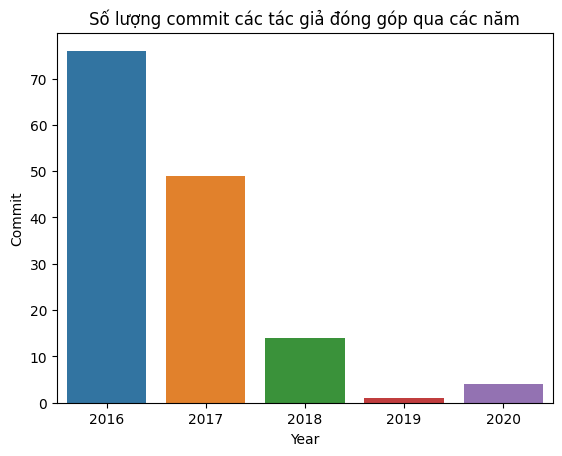

In [51]:
sns.barplot(x = 'Year', y = 'Commit', data = author_counts_by_year)
plt.title('Số lượng commit các tác giả đóng góp qua các năm')

# Ta có nhận xét: Repo hoạt động mạnh vào các năm 2016,2017,2018. Trong các năm gần đây rất ít các commit mới.
# Tần suất commit đã giảm đi đáng kể trong những năm gần đây

## 4.Phân tích cột Author Email

### Câu hỏi đặt ra:
+ Câu 1: Số lượng tác giả khác nhau ?
+ Câu 2: Số lượng email khác nhau ?
+ Câu 3: Nếu số lượng tác giả khác số lượng email. Tìm các tác giả dùng chung email.


In [52]:
# Đếm số lượng tác giả khác nhau trong cột 'Author Name'
num_unique_authors = df['Author Name'].nunique()

print("Số lượng tác giả khác nhau trong cột 'Author Name':", num_unique_authors)

Số lượng tác giả khác nhau trong cột 'Author Name': 134


In [53]:
# Số lượng email khác nhau trong cột 'Author Email'
num_unique_emails = df['Author Email'].nunique()

print("Số lượng tác giả khác nhau trong cột 'Author Email':", num_unique_emails)

Số lượng tác giả khác nhau trong cột 'Author Email': 129


In [54]:
# Lọc các dòng chứa các tác giả tên khác nhau dùng chung email
filtered_df = df.groupby('Author Email').filter(lambda x: x['Author Name'].nunique() > 1)

# In ra tên tác giả và email tương ứng
authors_emails = filtered_df[['Author Name', 'Author Email']].drop_duplicates()
print(authors_emails)

# Tác giả Aymeric Damien dùng nhiều tên và email nhất

         Author Name              Author Email
0      aymericdamien  aymeric.damien@gmail.com
4     Aymeric Damien  aymeric.damien@gmail.com
57   Ruslan Melnikov     ruslanmlnkv@gmail.com
65            WHAAAT  werdumich@googlemail.com
93       Ruslanmlnkv     ruslanmlnkv@gmail.com
161    Torben Peters  werdumich@googlemail.com
198     jakubsimanek     simanek@spaceknow.com
209      IslandMan93     islandman93@gmail.com
273      Islandman93     islandman93@gmail.com
276    Jakub Simanek     simanek@spaceknow.com
295            kengz         kengzwl@gmail.com
317    Wah Loon Keng         kengzwl@gmail.com
495    aymericdamien         damien@immomo.com
552        JohnAllen   johnjalleniii@gmail.com
557         jdsutton      jdsutton@calpoly.edu
566      John Sutton      jdsutton@calpoly.edu
583       John Allen   johnjalleniii@gmail.com
590   Aymeric Damien         damien@immomo.com


In [56]:
# Tách đuôi email từ cột 'Author Email'
email_domains = df['Author Email'].str.split('@', expand=True)[1]

# Đếm số lượng từng đuôi email
email_counts = email_domains.value_counts()

# In ra từng đuôi email và số lượng cụ thể
for domain, count in email_counts.items():
    print(f"{domain}: {count}")

gmail.com: 398
users.noreply.github.com: 31
mailframe.net: 23
immomo.com: 22
spaceknow.com: 10
mit.edu: 8
sina.com: 6
calpoly.edu: 5
qq.com: 5
googlemail.com: 4
163.com: 4
melekhin.me: 3
vt.edu: 3
usu.edu: 3
hotmail.com: 3
fyson.net: 3
126.com: 2
perscitia.local: 2
yopmail.com: 2
web.de: 2
naver.com: 1
vincit.fi: 1
outlook.com: 1
sjtu.edu.cn: 1
mikesz.com: 1
chas.io: 1
holzfuss.name: 1
gmu.edu: 1
gmai.com: 1
lightsoft.ru: 1
duolingo.com: 1
up.edu.ph: 1
waqu.com: 1
mail.hfut.edu.cn: 1
aijia.io: 1
torrencefamily.net: 1
mbnet.fi: 1
righto.com: 1


In [57]:
# Tạo từ điển để liên kết các đuôi email với quốc gia tương ứng
domain_country_mapping = {
    'gmail.com': 'global',
    'googlemail.com': 'global',
    'naver.com': 'South Korea',
    'outlook.com': 'global',
    'hotmail.com': 'global',
    'qq.com': 'China',
    '163.com': 'China',
    '126.com': 'China',
    'web.de': 'Germany',
    'melekhin.me': 'global',
    'sina.com': 'China',
    'spaceknow.com': 'global',
    'lightsoft.ru': 'Russia',
    'vt.edu': 'United States',
    'gmu.edu': 'United States',
    'mit.edu': 'United States',
    'calpoly.edu': 'United States',
    'sjtu.edu.cn': 'China',
    'usu.edu': 'United States',
    'up.edu.ph': 'Philippines',
    'duolingo.com': 'global',
    'torrencefamily.net': 'global',
    'aijia.io': 'global',
    'mail.hfut.edu.cn': 'China',
    'waqu.com': 'global',
    'perscitia.local': 'global',
    'righto.com': 'global',
    'immomo.com': 'global',
    'fyson.net': 'global',
    'mikesz.com': 'global',
    'mailframe.net': 'global',
    'yopmail.com': 'global'
}

# Tạo từ điển để lưu trữ tổng số lượng đuôi email của từng quốc gia
country_totals = {}

# Tính tổng số lượng đuôi email của từng quốc gia
for domain, count in email_counts.items():
    country = domain_country_mapping.get(domain, 'global')
    if country in country_totals:
        country_totals[country] += count
    else:
        country_totals[country] = count

# In ra từng quốc gia và tổng số lượng đuôi email tương ứng
for country, total in country_totals.items():
    print(f"{country}: {total}")

global: 513
United States: 20
China: 19
Germany: 2
South Korea: 1
Russia: 1
Philippines: 1


## 5.Phân tích cột "Changed Files"

### Câu hỏi đặt ra:
+ Câu 1: Những files nào được thay đổi gần đây nhất ?
+ Câu 2: Những cụm từ thường xuất hiện tên files ?

In [58]:
# Tạo 1 df mới:
new_df = df.loc[:, [ "Changed Files", "Commit Date"]]
new_df['Year'] = new_df['Commit Date'].dt.year

# Tìm năm gần nhất:
recent_year = new_df['Year'].max()

# In ra các files được thay đổi gần đây:
changed_files = new_df[new_df['Year'] == recent_year]['Changed Files']
print("Các files được thay đổi gần đây nhất:")
for file_list in changed_files:
    file_names = "".join(file_list)
    print(file_names)

Các files được thay đổi gần đây nhất:
['tflearn/activations.py', 'tflearn/objectives.py']
['tflearn/objectives.py']
['tflearn/datasets/fashion_mnist.py']
['examples/nlp/lstm_generator_textfile.py', 'tflearn/datasets/cifar10.py', 'tflearn/utils.py']
['tflearn/activations.py']
['tflearn/activations.py']
['README.md', 'setup.py', 'tests/test_validation_monitors.py']


In [59]:
file_names = ' '.join(df['Changed Files'])
file_names_lower = file_names.lower()

word_counts = collections.Counter(file_names_lower.split())
most_common_words = word_counts.most_common(10)
print("Những cụm từ thường xuất hiện nhất trong cột 'Changed Files':")
for word, count in most_common_words:
    print(word, "-", count)

Những cụm từ thường xuất hiện nhất trong cột 'Changed Files':
['tflearn/data_utils.py'] - 32
['tflearn/layers/conv.py'] - 28
['tflearn/helpers/trainer.py'] - 27
['tflearn/layers/recurrent.py'] - 21
['docs/templates/examples.md', - 17
'tflearn/layers/core.py', - 16
['tflearn/layers/conv.py', - 16
['docs/templates/getting_started.md'] - 16
['tflearn/layers/core.py'] - 16
['tflearn/activations.py'] - 14


,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
607,28d0c752250dae72ea8d02db9133b1a6c2369d3e,fix typo,2016-04-02 10:33:36,"['README.md', 'docs/templates/index.md']",2,2,2,aymericdamien,aymeric.damien@gmail.com
608,d040e6f1b6b62d9f2e276da1d5e8699c704b5a1a,fix typo,2016-04-02 06:47:17,"['README.md', 'docs/templates/index.md']",2,2,2,aymericdamien,aymeric.damien@gmail.com
609,f50bb1df4cdc1c5bfee2cb6508257edc4a27584b,updated docs,2016-03-31 15:56:49,"['README.md', 'docs/templates/getting_started....",2,14,19,aymericdamien,aymeric.damien@gmail.com
610,7e79b72d329a7d8605d8d712736f6b3a84c2a235,added residual nets,2016-03-31 15:56:03,['examples/images/residual_network_cifar10.py'...,3,117,10,aymericdamien,aymeric.damien@gmail.com
611,d421f2d1e51090e607634604ee80ff889410ddd2,fix examples link,2016-03-31 12:12:17,"['README.md', 'docs/templates/examples.md', 'e...",3,3,3,aymericdamien,aymeric.damien@gmail.com
